## Importing the libraries

In [2]:
import os
import numpy as np
import pandas as pd
#import matplotlib
#matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

## Reading in the data files

In [3]:
df_listings = pd.read_csv('Data/listings.csv', dtype='str')

## Data Exploration

### Listings Dataframe

In [4]:
df_listings.shape

(86358, 106)

In [5]:
pd.set_option('display.max_columns', None)

# show listings data sample
df_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20200414180850,2020-04-16,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,NaN,NaN,https://a0.muscache.com/im/pictures/ffb507b7-9...,NaN,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,71%,89%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,4,4,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",LB of Islington,Islington,NaN,Islington,Greater London,N4 3,London,"Islington, United Kingdom",GB,United Kingdom,51.56802,-0.11121,t,Apartment,Private room,2,1.0,1,0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",538,$65.00,$333.00,"$1,176.00",$100.00,$15.00,1,$15.00,1,29,1,1,29,29,1.0,29.0,12 months ago,t,27,57,84,359,2020-04-16,21,7,2010-08-18,2020-02-22,97,10,10,10,10,9,9,f,NaN,NaN,f,f,moderate,f,f,2,1,1,0,0.18
1,15400,https://www.airbnb.com/rooms/15400,20200414180850,2020-04-16,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,NaN,NaN,https://a0.muscache.com/im/pictures/428392/462...,NaN,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,50%,67%,f,https://a0.muscache.com/im/users/60302/

In [6]:
set(df_listings.columns[df_listings.isnull().mean()>0.75])

{'jurisdiction_names',
 'license',
 'medium_url',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'square_feet',
 'thumbnail_url',
 'weekly_price',
 'xl_picture_url'}

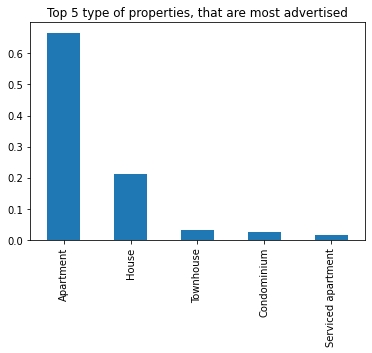

In [7]:
neighbourhood_vals = df_listings['property_type'].value_counts()

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(neighbourhood_vals[0:5]/df_listings.shape[0]).plot(kind="bar");
plt.title("Top 5 type of properties, that are most advertised");

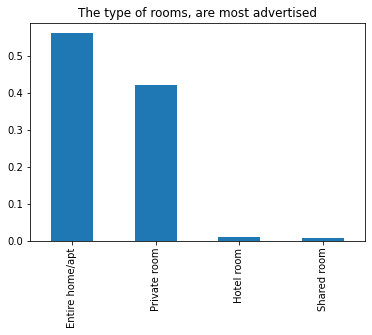

In [8]:
room_vals = df_listings['room_type'].value_counts()

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(room_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("The type of rooms, are most advertised");

## The business questions

**What are Airbnb current challanges?**

**Question 1**
- What is the average price for the different location? 

In [21]:
price_df = df_listings[df_listings['price'].isnull() == False]

In [22]:
prices = pd.DataFrame(df_listings['price'].value_counts())
prices.reset_index(level=0, inplace=True)
prices.rename(columns={'index': 'price', 'price': 'count'}, inplace=True)

In [23]:
prices.head()

,price,count
0,$50.00,3180
1,$100.00,3078
2,$40.00,2779
3,$30.00,2465
4,$150.00,2452


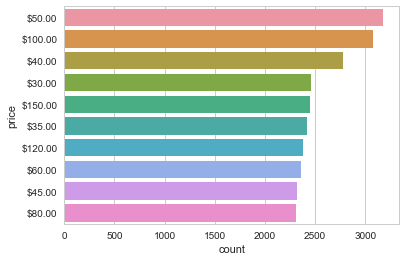

In [24]:
sns.set(style="whitegrid")
ax = sns.barplot(x="count", y="price", data=prices[:10])

**Question 2**

- What types of amenities are included in a listing? 

In [25]:
amenities_df = df_listings[df_listings['amenities'].isnull() == False]

**Question 3**
- What features assist in obtaining a good review score? 
    - predict the score
    - importance of the features, rank features

## The Data Preparation

In [26]:
# Dropping columns that are not needed from the listings dataframe
def drop_columns(words,df):
    for word in words:
        df = df.drop(df.filter(regex=word).columns, axis=1)
    
    return df

column_words = ['url','scrape','jurisdiction_names','license','weekly_price','monthly_price',
                'availability','square_feet','minimum','maximum','calculated','id']
df_listings = drop_columns(column_words, df_listings)

In [27]:
df_listings.head(3)

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,71%,89%,f,LB of Islington,4,4,"['email', 'phone', 'facebook', 'reviews', 'off...",t,"Islington, Greater London, United Kingdom",LB of Islington,Islington,NaN,Islington,Greater London,N4 3,London,"Islington, United Kingdom",GB,United Kingdom,51.56802,-0.11121,t,Apartment,Private room,2,1.0,1,0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",$65.00,$100.00,$15.00,1,$15.00,12 months ago,21,7,2010-08-18,2020-02-22,97,10,10,10,10,9,9,f,f,moderate,f,f,0.18
1,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,50%,67%,f,Chelsea,1,1,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"London, United Kingdom",Chelsea,Kensington and Chelsea,NaN,London,NaN,SW3,London,"London, United Kingdom",GB,United Kingdom,51.48796,-0.16898,t,Apartment,Entire home/apt,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$100.00,$150.00,$50.00,2,$0.00,3 months ago,89,6,2009-12-21,2020-03-16,96,10,10,10,10,10,9,t,f,strict_14_with_grace_period,t,t,0.71
2,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"This is a wonderful very popular beautiful, sp...",You'll have a wonderful stay in this superb mo...,none,"Location, location, location! You won't find b...",This property has new flooring throughout. Gue...,You can walk to tourist London or take numerou...,Full use of whole independent apartment,"Always available by email or phone (before, du...",* The apartment benefits from new flooring thr...,Liz,2010-01-04,"London, England, United Kingdom",We are Liz and Jack. We manage a number of ho...,within an hour,80%,94%,f,Fitzrovia,18,18,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"London, Fitzrovia, United Kingdom",Fitzrovia,Westminster,NaN,London,Fitzrovia,W1T4BP,London,"London, United Kingdom",GB,United Kingdom,51.52

In [ ]:
df_listings = df_listings.dropna(subset=["review_scores_rating"])

In [ ]:
def change_to_int(df):
    return df.astype('int64')

df_listings["id"] = change_to_int(df_listings["id"])
df_listings["review_scores_rating"] = change_to_int(df_listings["review_scores_rating"])
df_listings["review_scores_rating"] = change_to_int(df_listings["review_scores_rating"])
df_listings["review_scores_accuracy"] = change_to_int(df_listings["review_scores_accuracy"])
df_listings["review_scores_cleanliness"] = change_to_int(df_listings["review_scores_cleanliness"])
df_listings["review_scores_checkin"] = change_to_int(df_listings["review_scores_checkin"])
df_listings["review_scores_communication"] = change_to_int(df_listings["review_scores_communication"])
df_listings["review_scores_location"] = change_to_int(df_listings["review_scores_location"])
df_listings["review_scores_rating"] = change_to_int(df_listings["review_scores_value"])